# 1 3 5 - Jack
# 2 4 - Jayden
Explain why we chose a given algorithm not how the algorithm works

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

In [2]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
train, target, test = read_classification_dataset(1)
target.iloc[:,0].unique()

c:\Users\Morri\Documents\Notebooks\ML\Project


array([1, 2, 4, 3, 5], dtype=int64)

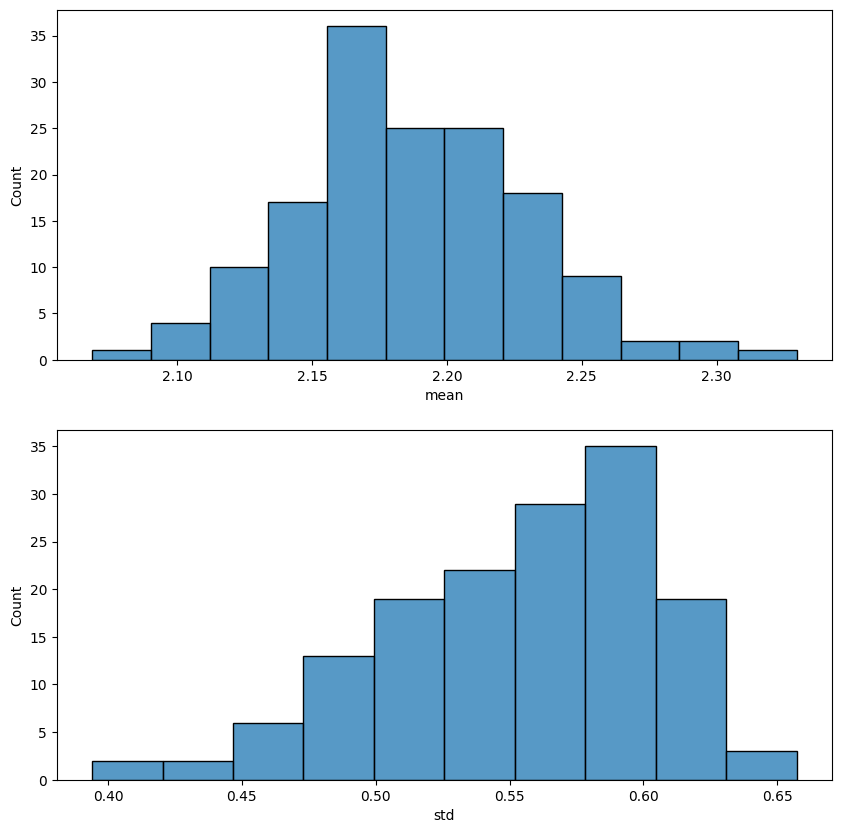

In [7]:
train.mean(axis=1)
features_histograms_mean_std(train.T)

StandardScaler()


In [4]:

from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_biclusters
from sklearn.metrics import consensus_score


train, target, test = read_classification_dataset(2)
X = train.values
imputer = KNNImputer(n_neighbors=3, weights='distance')
data = imputer.fit_transform(X)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

model = SpectralCoclustering(n_clusters=50, random_state=0, svd_method='randomized', mini_batch = True)
model.fit(data)
assert False
# score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

# print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

: 

In [5]:
# KNN Scores
knn = Pipeline(
    [
        ('Imputer', KNNImputer(n_neighbors=3, weights='distance')),
        ('Scaler', MinMaxScaler(feature_range=(0, 1))),
        ('KNN', KNeighborsClassifier(3, weights='distance',)),
    ]
)
def test_model_on_all_data(model, data:list=list(range(1,6))):
    predicitons = []
    for i in data:
        try:
            train, target, test = read_classification_dataset(i)
            X, y = train.values, target.values.flatten()
            score = cross_val_score(model, X, y,scoring='f1_weighted', cv=5)
            print(f"dataset {i} weighted F1 score 5 fold cv: ",score)
            predicitons.append(model.fit(train, np.ravel(target)).predict(test.values))
        except ValueError as e:
            print(e)
    return predicitons

def test_model_on_data(model, data_set_number:int):
    try:
        train, target, test = read_classification_dataset(i)
        X, y = train.values, target.values.flatten()
        score = cross_val_score(model, X, y,scoring='f1_weighted', cv=5)
        print(f"dataset {i} weighted F1 score 5 fold cv: ",score)
        predicitons = model.fit(train, np.ravel(target)).predict(test.values)
        return predicitons

    except ValueError as e:
        print(e)

test_model_on_all_data(knn)

    # else:
    #     display(train.dtypes)
    #     display(train.head())

c:\Users\Morri\Documents\Notebooks\ML\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


dataset 1 weighted F1 score 5 fold cv:  [1.         0.96866002 0.89555556 0.91262626 0.9503876 ]
dataset 2 weighted F1 score 5 fold cv:  [0.93       0.89666667 0.84666667 0.58666667 0.83333333]
dataset 3 weighted F1 score 5 fold cv:  [0.27879944 0.25214527 0.28124662 0.27397405 0.26759597]
dataset 4 weighted F1 score 5 fold cv:  [0.8001186  0.65752045 0.64975154 0.56101407 0.42992551]
dataset 5 weighted F1 score 5 fold cv:  [0.41752807 0.49388537 0.51068452 0.49077729 0.52656167]


[array([2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
        3, 3, 4, 1, 5, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 4, 3, 5, 1, 1, 4, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([ 3, 11,  2,  4,  8,  8,  8,  8,  4,  8, 10, 11,  1,  1, 10,  8,  6,
         3,  8,  9,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 10, 11, 10, 11,
         4, 10, 11,  3,  3,  3,  3,  3,  3,  3,  2,  8,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  8,  8,  8,  8,  8,  8,  8,
        11,  8, 10,  8,  8,  8], dtype=int64),
 array([7, 8, 1, ..., 2, 7, 4], dtype=int64),
 array([1, 1, 1, ..., 8, 8, 8], dtype=int64),
 array([5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 6, 5,
        6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
        5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5,
        6, 7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 3, 6, 6, 6, 7, 5, 6, 6,
        6, 6, 5, 6, 5, 7, 5, 6, 6, 7, 6, 6, 5, 8, 5, 6, 5, 7, 6

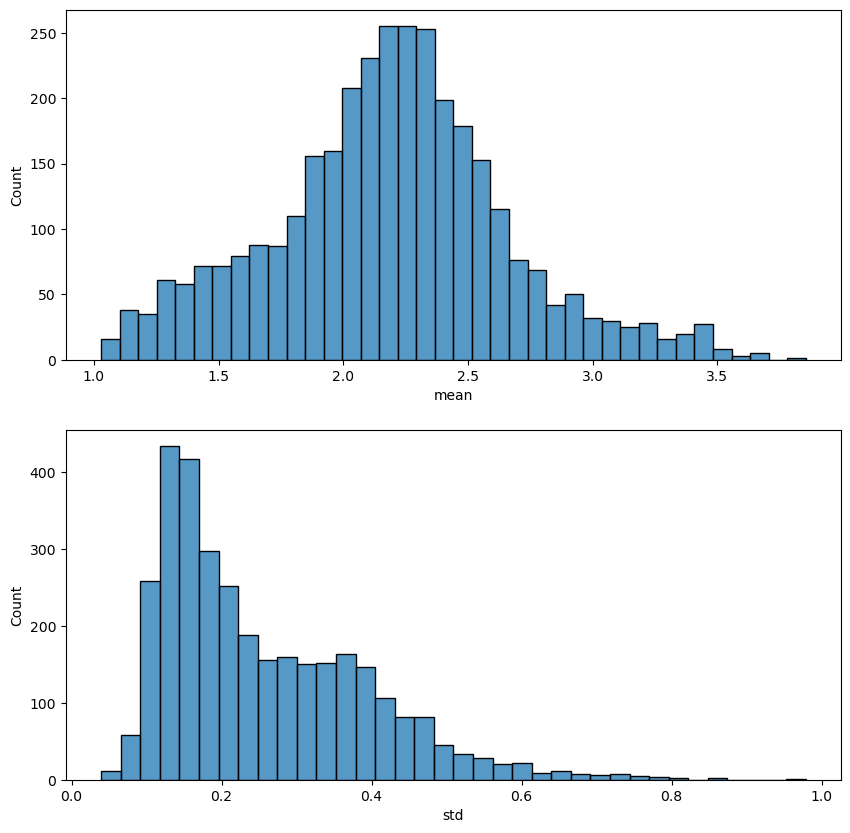

In [40]:
features_histograms_mean_std(train)

In [41]:
print("Missing value count:",  train.isna().sum().sum())
print("Number of categories:",(len(target[0].unique())))

Missing value count: 9936
Number of categories: 5


In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
# from sklearn.decomposition import PCA
# train_test_split

# n=150
# # do PCA dim reduction to 5
# pca = PCA(n_components=n)
# pca_evr = pca.fit(scale(train))

# pca_evr = (pca.explained_variance_ratio_)



# pca_evr = np.concatenate((np.zeros(1), pca_evr))
# plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title("PCA - Cumulative Explained Variance Ratio")
# plt.grid()
# print(np.cumsum(pca_evr))

In [49]:
# raise KeyError
clf = Pipeline([
  ('imputation', KNNImputer(n_neighbors=3, weights='distance')),
  ('classification', RandomForestClassifier())
])
# clf.fit(train.values, target.values.flatten())
# Test Random Forest
scores = cross_val_score(clf, X, y, scoring='f1_weighted',  cv=5)
scores


c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.82222222, 0.9637037 , 0.847343  , 0.85333333, 0.9503876 ])

In [44]:
# clf = LassoCV().fit(X, y)
# importance = np.abs(clf.coef_)
# idx_third = importance.argsort()[-3]
# threshold = importance[idx_third] + 0.01

# idx_features = (-importance).argsort()[:2]
# # name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(idx_features))

# sfm = SelectFromModel(clf, threshold=threshold)
# sfm.fit(X, y)
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]

In [50]:
# knn = KNeighborsClassifier(7, p=3000, weights='distance',n_jobs = -1)
# knn.fit( MinMaxScaler(feature_range=(0, 1)).fit_transform(train.values), target.values)
knn = Pipeline(
    [
        ('Imputer', KNNImputer(n_neighbors=3, weights='distance')),
        ('Scaler', MinMaxScaler(feature_range=(0, 1))),
        ('KNN', KNeighborsClassifier(3, weights='distance',)),
    ]
)

# score = cross_val_score(knn, MinMaxScaler(feature_range=(0, 1)).fit_transform(X), y, cv=3)
score = cross_val_score(knn, X, y,scoring='f1_weighted', cv=5)
score

c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([1.        , 0.96866002, 0.89555556, 0.91262626, 0.9503876 ])

NameError: name 'read_classification_dataset' is not defined